# Positive/Negative Sentiment analysis (Deeplearning.AI - NLP) Assignment

In [54]:
import pandas as pd
from text_process import TextProcess
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch
import model
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("Data/train.csv")

In [28]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [29]:
data.drop("id", inplace=True, axis=1)

In [30]:
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [31]:
data.shape

(31962, 2)

(31962, 2)

In [32]:
labels = data["label"]
data = data.values

In [33]:
data[:5]

array([[0,
        ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'],
       [0,
        "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"],
       [0, '  bihday your majesty'],
       [0,
        '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '],
       [0, ' factsguide: society now    #motivation']], dtype=object)

array([[0,
        ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'],
       [0,
        "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"],
       [0, '  bihday your majesty'],
       [0,
        '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '],
       [0, ' factsguide: society now    #motivation']], dtype=object)

In [34]:
text_process = TextProcess()

Initialized Successfully
Initialized Successfully


In [35]:
for i in data:
    text_process.extract_info(i[1], i[0])

Extraction Number: 1
Extraction Number: 2
Extraction Number: 3
Extraction Number: 4
Extraction Number: 5
Extraction Number: 6
Extraction Number: 7
Extraction Number: 8
Extraction Number: 9
Extraction Number: 10
Extraction Number: 11
Extraction Number: 12
Extraction Number: 13
Extraction Number: 14
Extraction Number: 15
Extraction Number: 16
Extraction Number: 17
Extraction Number: 18
Extraction Number: 19
Extraction Number: 20
Extraction Number: 21
Extraction Number: 22
Extraction Number: 23
Extraction Number: 24
Extraction Number: 25
Extraction Number: 26
Extraction Number: 27
Extraction Number: 28
Extraction Number: 29
Extraction Number: 30
Extraction Number: 31
Extraction Number: 32
Extraction Number: 33
Extraction Number: 34
Extraction Number: 35
Extraction Number: 36
Extraction Number: 37
Extraction Number: 38
Extraction Number: 39
Extraction Number: 40
Extraction Number: 41
Extraction Number: 42
Extraction Number: 43
Extraction Number: 44
Extraction Number: 45
Extraction Number: 

In [36]:
vec = text_process.extract_feature(data[:, 1])

In [37]:
len(vec)

31962

31962

In [38]:
vec[:5]

[[1, 26, 1416], [1, 90, 1991], [1, 0, 870], [1, 265, 22013], [1, 10, 254]]

[[1, 26, 1416], [1, 90, 1991], [1, 0, 870], [1, 265, 22013], [1, 10, 254]]

In [39]:
data[:5]

array([[0,
        ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'],
       [0,
        "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"],
       [0, '  bihday your majesty'],
       [0,
        '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '],
       [0, ' factsguide: society now    #motivation']], dtype=object)

array([[0,
        ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'],
       [0,
        "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"],
       [0, '  bihday your majesty'],
       [0,
        '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '],
       [0, ' factsguide: society now    #motivation']], dtype=object)

In [40]:
data = torch.tensor(vec).float()

In [41]:
labels = torch.tensor(labels).float()

In [42]:
labels = labels[:, None]

In [43]:
labels

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In [44]:
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.2)

In [45]:
train_dataset = TensorDataset(train_data, train_label)
test_dataset = TensorDataset(test_data, test_label)

In [46]:
train_loader = DataLoader(train_dataset, batch_size=132, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0])

In [53]:
net, train_acc, test_acc, train_loss, test_loss = model.train_model(train_loader, test_loader)

Training on cuda:0
Epoch: 1, Train Acc: 92.05527061625466, Test Acc: 93.00797581672668
Epoch: 2, Train Acc: 93.34668232986964, Test Acc: 93.22696328163147
Epoch: 3, Train Acc: 93.37808458916264, Test Acc: 93.1800365447998
Epoch: 4, Train Acc: 93.42911295940222, Test Acc: 93.1800365447998
Epoch: 5, Train Acc: 93.42518757662008, Test Acc: 93.28953623771667


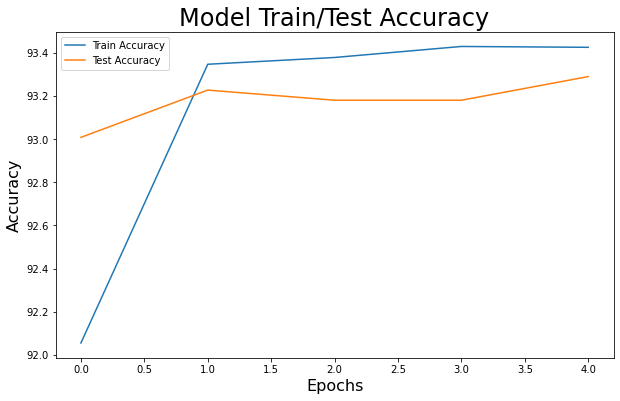

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("Model Train/Test Accuracy", fontdict={"fontsize": 24})
plt.xlabel("Epochs", fontdict={"fontsize": 16})
plt.ylabel("Accuracy", fontdict={"fontsize": 16})
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

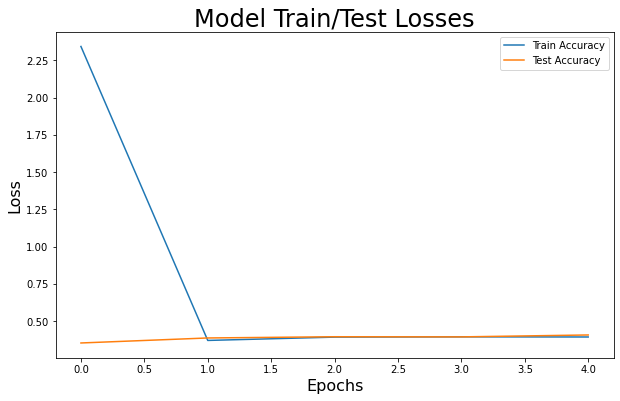

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss)
plt.plot(test_loss)
plt.title("Model Train/Test Losses", fontdict={"fontsize": 24})
plt.xlabel("Epochs", fontdict={"fontsize": 16})
plt.ylabel("Loss", fontdict={"fontsize": 16})
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

# The END